In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from statsmodels.stats.proportion import proportions_ztest

## Setup (DAPI/EdU)

In [2]:
# Load annotation
df = pd.read_csv('../annotation/annotation_u2os/nuclei_u2os_sphase_CY5_all.tsv', sep='\t')

# Load embeddings and center
embeddings_arr = np.load('embeddings/embeddings_BYOL_u2os_CY5_all.npy', allow_pickle=True)
scaler = StandardScaler(with_mean=True, with_std=False)
X_centered = scaler.fit_transform(embeddings_arr)

# Run PCA
pca = PCA(n_components=2, random_state=42)
X_emb = pca.fit_transform(X_centered)

### PC1>100 AND PC2>0
- Bar plots
- Statistics

In [3]:
# PC1 & PC2
PC1, PC2 = X_emb[:, 0], X_emb[:, 1]
thresh1, thresh2 = 100, 0  
plot_name = f'PC1>{thresh1}  AND  PC2>{thresh2}'

# Subset dataframe for nuclei
thresh_indices = np.where((PC1 > thresh1) & (PC2 > thresh2))   # PC1 & PC2
dfThresh = df.iloc[thresh_indices]
dfAll = df.copy()

### Bar plots

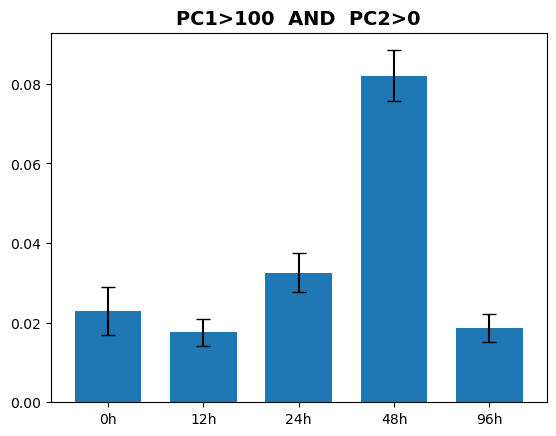

In [4]:
# Order timepoints
timepoints_ordered = ['0h', '12h', '24h', '48h', '96h']

# Obtain number and proportion of nuclei (ordered by genotype)
thresh_counts = dfThresh['timepoint'].value_counts().sort_index().reindex(index=timepoints_ordered)
all_counts = dfAll['timepoint'].value_counts().sort_index().reindex(index=timepoints_ordered)
thresh_prop = thresh_counts/all_counts

# Calculate 95% confidence interval
ci_95 = 1.96 * (((thresh_prop * (1 - thresh_prop))/all_counts)**0.5)

# Plot
thresh_prop.plot.bar(yerr=ci_95, capsize=5, width=0.7)
plt.title(plot_name, fontsize=14, fontweight='bold')
plt.xticks(rotation=0);

In [5]:
# Statistics (Two-proportion Z-test)
indices_control, indices_test = [0, 0, 0, 0], [1, 2, 3, 4]
names = ['0h', '12h', '24h', '48h', '96h']

for name, (index_control, index_test) in enumerate(zip(indices_control, indices_test)):
    x1, x2 = thresh_counts[index_control], thresh_counts[index_test] 
    n1, n2 = all_counts[index_control], all_counts[index_test] 
    z, p = proportions_ztest(count=np.array([x1, x2]), nobs=np.array([n1, n2]), alternative='two-sided')
    print(names[name+1])
    print(f'Z = {z:.4f}, p-value = {p:.1e}\n')

12h
Z = 1.6173, p-value = 1.1e-01

24h
Z = -2.3186, p-value = 2.0e-02

48h
Z = -10.0880, p-value = 6.2e-24

96h
Z = 1.2542, p-value = 2.1e-01



## Setup (DAPI/PCNA)
- PC1>200
- PC2>25

In [6]:
# Load annotation
df = pd.read_csv('../annotation/annotation_u2os/nuclei_u2os_sphase_FITC_all.tsv', sep='\t')

# Load embeddings and center
embeddings_arr = np.load('embeddings/embeddings_BYOL_u2os_FITC_all.npy', allow_pickle=True)
scaler = StandardScaler(with_mean=True, with_std=False)
X_centered = scaler.fit_transform(embeddings_arr)

# Run PCA
pca = PCA(n_components=2, random_state=42)
X_emb = pca.fit_transform(X_centered)

### PC1 > 200
- Bar plots
- Statistics

In [7]:
# PC1
PC = X_emb[:, 0]
thresh = 200
plot_name = f'PC1>{thresh}'

# Subset dataframe for nuclei
thresh_indices = np.where(PC > thresh)  
dfThresh = df.iloc[thresh_indices]
dfAll = df.copy()

### Bar plots

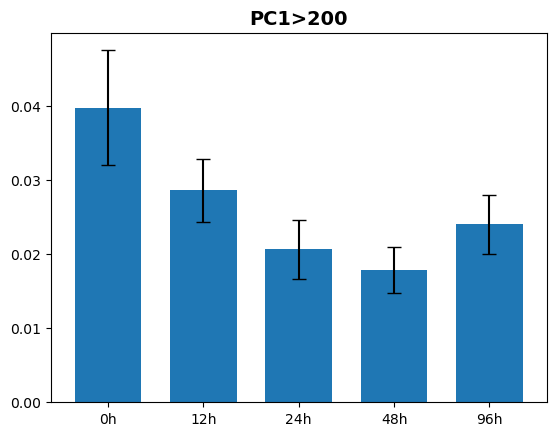

In [8]:
# Order timepoints
timepoints_ordered = ['0h', '12h', '24h', '48h', '96h']

# Obtain number and proportion of nuclei (ordered by genotype)
thresh_counts = dfThresh['timepoint'].value_counts().sort_index().reindex(index=timepoints_ordered)
all_counts = dfAll['timepoint'].value_counts().sort_index().reindex(index=timepoints_ordered)
thresh_prop = thresh_counts/all_counts

# Calculate 95% confidence interval
ci_95 = 1.96 * (((thresh_prop * (1 - thresh_prop))/all_counts)**0.5)

# Plot
thresh_prop.plot.bar(yerr=ci_95, capsize=5, width=0.7)
plt.title(plot_name, fontsize=14, fontweight='bold')
plt.xticks(rotation=0);

### Statistics

In [9]:
# Statistics (Two-proportion Z-test)
indices_control, indices_test = [0, 0, 0, 0], [1, 2, 3, 4]
names = ['0h', '12h', '24h', '48h', '96h']

for name, (index_control, index_test) in enumerate(zip(indices_control, indices_test)):
    x1, x2 = thresh_counts[index_control], thresh_counts[index_test] 
    n1, n2 = all_counts[index_control], all_counts[index_test] 
    z, p = proportions_ztest(count=np.array([x1, x2]), nobs=np.array([n1, n2]), alternative='two-sided')
    print(names[name+1])
    print(f'Z = {z:.4f}, p-value = {p:.1e}\n')

12h
Z = 2.6333, p-value = 8.5e-03

24h
Z = 4.7878, p-value = 1.7e-06

48h
Z = 6.1506, p-value = 7.7e-10

96h
Z = 3.8959, p-value = 9.8e-05



### PC2 > 25
- Bar plots
- Statistics

In [10]:
# PC2
PC = X_emb[:, 1]
thresh = 25
plot_name = f'PC2>{thresh}'

# Subset dataframe for nuclei
thresh_indices = np.where(PC > thresh)  
dfThresh = df.iloc[thresh_indices]
dfAll = df.copy()

### Bar plots

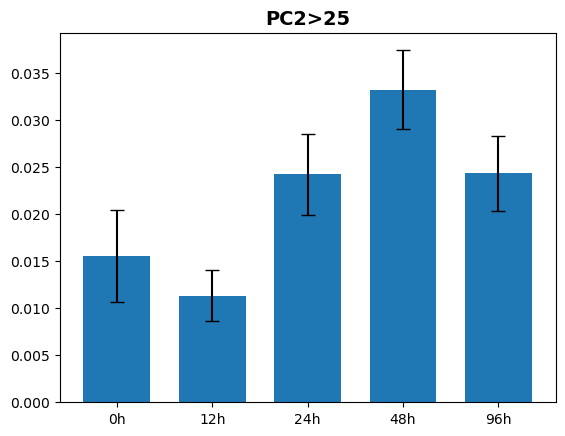

In [11]:
# Order timepoints
timepoints_ordered = ['0h', '12h', '24h', '48h', '96h']

# Obtain number and proportion of nuclei (ordered by genotype)
thresh_counts = dfThresh['timepoint'].value_counts().sort_index().reindex(index=timepoints_ordered)
all_counts = dfAll['timepoint'].value_counts().sort_index().reindex(index=timepoints_ordered)
thresh_prop = thresh_counts/all_counts

# Calculate 95% confidence interval
ci_95 = 1.96 * (((thresh_prop * (1 - thresh_prop))/all_counts)**0.5)

# Plot
thresh_prop.plot.bar(yerr=ci_95, capsize=5, width=0.7)
plt.title(plot_name, fontsize=14, fontweight='bold')
plt.xticks(rotation=0);

In [12]:
# Statistics (Two-proportion Z-test)
indices_control, indices_test = [0, 0, 0, 0], [1, 2, 3, 4]
names = ['0h', '12h', '24h', '48h', '96h']

for name, (index_control, index_test) in enumerate(zip(indices_control, indices_test)):
    x1, x2 = thresh_counts[index_control], thresh_counts[index_test] 
    n1, n2 = all_counts[index_control], all_counts[index_test] 
    z, p = proportions_ztest(count=np.array([x1, x2]), nobs=np.array([n1, n2]), alternative='two-sided')
    print(names[name+1])
    print(f'Z = {z:.4f}, p-value = {p:.1e}\n')

12h
Z = 1.5757, p-value = 1.2e-01

24h
Z = -2.4211, p-value = 1.5e-02

48h
Z = -4.5095, p-value = 6.5e-06

96h
Z = -2.4864, p-value = 1.3e-02



## Setup (DAPI/PCNA/EdU)
- PC2>20
- PC1>250 & PC2<20

In [13]:
# Load annotation
df = pd.read_csv('../annotation/annotation_u2os/nuclei_u2os_sphase_FITC_all.tsv', sep='\t')

# Load embeddings and center
embeddings_arr = np.load('embeddings/embeddings_BYOL_u2os_3channel_all.npy', allow_pickle=True)
scaler = StandardScaler(with_mean=True, with_std=False)
X_centered = scaler.fit_transform(embeddings_arr)

# Run PCA
pca = PCA(n_components=2, random_state=42)
X_emb = pca.fit_transform(X_centered)

### PC2 > 20
- Bar plots
- Statistics

In [14]:
# PC2
PC = X_emb[:, 1]
thresh = 20
plot_name = f'PC2>{thresh}'

# Subset dataframe for nuclei
thresh_indices = np.where(PC > thresh)  
dfThresh = df.iloc[thresh_indices]
dfAll = df.copy()

### Bar plots

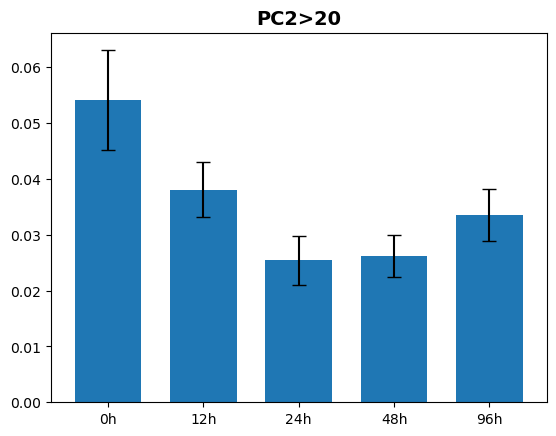

In [15]:
# Order timepoints
timepoints_ordered = ['0h', '12h', '24h', '48h', '96h']

# Obtain number and proportion of nuclei (ordered by genotype)
thresh_counts = dfThresh['timepoint'].value_counts().sort_index().reindex(index=timepoints_ordered)
all_counts = dfAll['timepoint'].value_counts().sort_index().reindex(index=timepoints_ordered)
thresh_prop = thresh_counts/all_counts

# Calculate 95% confidence interval
ci_95 = 1.96 * (((thresh_prop * (1 - thresh_prop))/all_counts)**0.5)

# Plot
thresh_prop.plot.bar(yerr=ci_95, capsize=5, width=0.7)
plt.title(plot_name, fontsize=14, fontweight='bold')
plt.xticks(rotation=0);

### Statistics

In [16]:
# Statistics (Two-proportion Z-test)
indices_control, indices_test = [0, 0, 0, 0], [1, 2, 3, 4]
names = ['0h', '12h', '24h', '48h', '96h']

for name, (index_control, index_test) in enumerate(zip(indices_control, indices_test)):
    x1, x2 = thresh_counts[index_control], thresh_counts[index_test] 
    n1, n2 = all_counts[index_control], all_counts[index_test] 
    z, p = proportions_ztest(count=np.array([x1, x2]), nobs=np.array([n1, n2]), alternative='two-sided')
    print(names[name+1])
    print(f'Z = {z:.4f}, p-value = {p:.1e}\n')

12h
Z = 3.2839, p-value = 1.0e-03

24h
Z = 6.3308, p-value = 2.4e-10

48h
Z = 6.6198, p-value = 3.6e-11

96h
Z = 4.3517, p-value = 1.4e-05



### PC1 > 250 & PC2 < 20
- Bar plots
- Statistics

In [17]:
# PC1 & PC2
PC1, PC2 = X_emb[:, 0], X_emb[:, 1]
thresh1, thresh2 = 250, 20  
plot_name = f'PC1>{thresh1}  AND  PC2<{thresh2}'

# Subset dataframe for nuclei
thresh_indices = np.where((PC1 > thresh1) & (PC2 < thresh2))   # PC1 & PC2
dfThresh = df.iloc[thresh_indices]
dfAll = df.copy()

### Bar plots

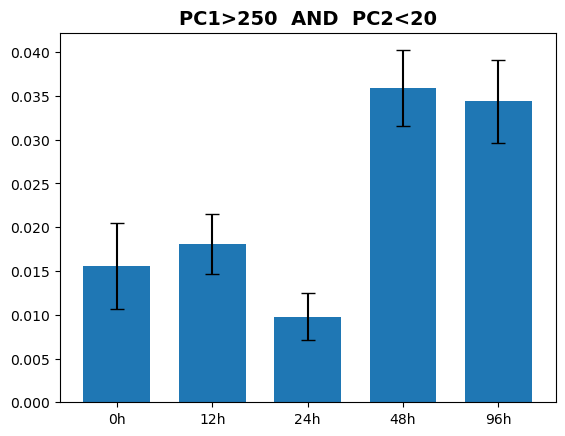

In [18]:
# Order timepoints
timepoints_ordered = ['0h', '12h', '24h', '48h', '96h']

# Obtain number and proportion of nuclei (ordered by genotype)
thresh_counts = dfThresh['timepoint'].value_counts().sort_index().reindex(index=timepoints_ordered)
all_counts = dfAll['timepoint'].value_counts().sort_index().reindex(index=timepoints_ordered)
thresh_prop = thresh_counts/all_counts

# Calculate 95% confidence interval
ci_95 = 1.96 * (((thresh_prop * (1 - thresh_prop))/all_counts)**0.5)

# Plot
thresh_prop.plot.bar(yerr=ci_95, capsize=5, width=0.7)
plt.title(plot_name, fontsize=14, fontweight='bold')
plt.xticks(rotation=0);

In [19]:
# Statistics (Two-proportion Z-test)
indices_control, indices_test = [0, 0, 0, 0], [1, 2, 3, 4]
names = ['0h', '12h', '24h', '48h', '96h']

for name, (index_control, index_test) in enumerate(zip(indices_control, indices_test)):
    x1, x2 = thresh_counts[index_control], thresh_counts[index_test] 
    n1, n2 = all_counts[index_control], all_counts[index_test] 
    z, p = proportions_ztest(count=np.array([x1, x2]), nobs=np.array([n1, n2]), alternative='two-sided')
    print(names[name+1])
    print(f'Z = {z:.4f}, p-value = {p:.1e}\n')

12h
Z = -0.8100, p-value = 4.2e-01

24h
Z = 2.1700, p-value = 3.0e-02

48h
Z = -5.0264, p-value = 5.0e-07

96h
Z = -4.6548, p-value = 3.2e-06

